In [44]:
# Importamos las librerías para trabajar con DFS(Depth-First Search)
# Búsqueda en profundidad

import networkx as nx
import matplotlib.pyplot as plt
from collections import deque


In [45]:
def dfs(grafo, inicio: str, objetivo: str, primer_y_ultimo_i: list[int], n_iteracion: list[int], visitados=None, camino=None, caminos_encontrados=None, n_profundidad: int=0, imprimir=False) -> list:
    n_profundidad += 1
    n_iteracion[0] += 1
    if imprimir:
        print("\nNivel de profundidad:", n_profundidad)
        print("Número de iteración:", n_iteracion)
        print("Primer visitado y último visitado en iteraciones: ", primer_y_ultimo_i)
    
    # Si entramos a este método por primera vez
    if visitados is None:
        visitados = set()
    if camino is None:
        camino = []
    if caminos_encontrados is None:
        caminos_encontrados = []

    camino.append(inicio)
    visitados.add(inicio)

    if imprimir:
        print("Nodo actual:", inicio)
    if imprimir:
        print("Nodos visitados", visitados)
    if imprimir:
        print("Camino Actual:", camino)

    if inicio == objetivo:
        if imprimir:
            print("Camino encontrado:", ' -> '.join(camino))
        if len(caminos_encontrados) == 0:
            primer_y_ultimo_i[0] = n_iteracion[0]
        else:
            primer_y_ultimo_i[1] = n_iteracion[0]
           
        caminos_encontrados.append(camino.copy())
    else:
        for vecino in grafo[inicio]:
            if vecino not in visitados:
                dfs(grafo, vecino, objetivo, primer_y_ultimo_i, visitados=visitados, camino=camino, caminos_encontrados=caminos_encontrados, n_profundidad=n_profundidad, n_iteracion=n_iteracion, imprimir=imprimir)

    camino.pop()  # Eliminamos el último nodo para retroceder al nodo anterior
    visitados.remove(inicio)

    tot_iteraciones = n_iteracion[0]
    return tot_iteraciones, caminos_encontrados


In [46]:
def bfs(grafo, inicio, objetivo, imprimir=False) -> tuple[int, int, list]:
    resultados = []
    # El método set crea un conjunto de datos SIMILAR a una lista pero que
    # NO puede tener elementos duplicados
    visitados = set()
    # (Doubly Ended Queue) Es un tio de lista que permite agregar y eliminar
    # elementos ya sea a la izquiera o a la derecha de la misma
    cola = deque([(inicio, [inicio])])

    i_primer_camino = None
    i_ultimo_camino = None

    i = 1
    while cola:
        # Aquí removemos el primer elemento del set (El de la izquierda)
        # y este será nuestro nodo actual, el resto, el camino (Path restante)
        nodo_actual, camino = cola.popleft()
        if imprimir:
            print("\nIteración:", i)
            print("Nodo actual:", nodo_actual)
        
        if nodo_actual == objetivo:
            if imprimir:
                print("Camino encontrado:", "->".join(camino))
            if len(resultados) == 0:
                i_primer_camino = i
            else:
                i_ultimo_camino = i
            resultados.append(camino)
        if nodo_actual not in visitados:
            visitados.add(nodo_actual)
            if imprimir:
                print("Nodos visitados", visitados)
            for vecino in grafo[nodo_actual]:
                if vecino not in visitados:
        
                    nueva_ruta = camino + [vecino]
                    if imprimir:
                        print("Nueva ruta:", nueva_ruta)
                    cola.append((vecino, nueva_ruta))
        i += 1
    # print("No se encontró un camino al nodo objetivo.")
    return (i, i_primer_camino, i_ultimo_camino, resultados)

In [50]:
def plotGrafo(grafo, caminos_encontrados, label: str, nodo_inicio: str, nodo_objetivo: str) -> None:
    G = nx.Graph(grafo)

    # Coloreamos los nodos según si están en algún camino o no
    colores = []
    for nodo in G.nodes():
        en_camino = False
        for camino in caminos_encontrados:
            if nodo in camino:
                en_camino = True
                break
        if en_camino:
            colores.append('green')
        elif (nodo == nodo_inicio) or (nodo == nodo_objetivo):
            colores.append("orange")
        else:
            colores.append('cyan')

    # Dibujamos el grafo
    pos = nx.spring_layout(G)
    fig = plt.figure(1, figsize=(50, 25))
    nx.draw(G, pos, with_labels=True, node_color=colores, node_size=5000, font_size=30)
    plt.title(label)
    plt.show()


def busqueda(grafo, nodo_inicio: str, nodo_objetivo: str, imprimir=False):
    # Para un dado grafo con nodo de inicio y fin, se ejecutan
    # múltiples algoritmos de búsqueda
    def mostrar_caminos_encontrados(caminos, tot_iteraciones, i_primer_camino, i_ultimo_camino):
        # Código común entre algoritmos de búsqueda para mostrar
        # resultados
        print(f"Total de iteraciones: {tot_iteraciones}")
        print(f"Primer camino encontrado en iteración: {i_primer_camino}")
        print(f"Último camino encontrado en iteración: {i_ultimo_camino}")
        
        if caminos:
            print(f"Todos los caminos encontrados ({len(caminos)}):")
            for i, camino in enumerate(caminos):
                print(f"{i+1}:".rjust(3), ' -> '.join(camino))

            # De los caminos encontrados, mostrar el/los más cortos
            min_len: int = min(len(c) for c in caminos)
            caminos_cortos = [c for c in caminos if len(c) == min_len]
            print(f"Caminos MÁS CORTOS encontrados ({len(caminos_cortos)}), len={min_len}:")
            for i, camino in enumerate(caminos_cortos):
                print(f"{i+1}:".rjust(3), ' -> '.join(camino))
            
        else:
            print("No se encontró un camino al nodo objetivo.")
        print()
        
    print(f"NODO DE INICIO: {nodo_inicio}\nNODO OBJETIVO: {nodo_objetivo}\n")
    
    ############################################################
    # DFS
    ############################################################
    print("Recorrido DFS:")
    primer_y_ultimo_i = [None, None]
    tot_iteraciones, caminos_encontrados = dfs(grafo, nodo_inicio, nodo_objetivo, primer_y_ultimo_i, n_iteracion=[0], imprimir=imprimir)
    i_primer_camino, i_ultimo_camino = primer_y_ultimo_i 
    mostrar_caminos_encontrados(caminos_encontrados, tot_iteraciones, i_primer_camino, i_ultimo_camino)
        
    ############################################################
    # BFS
    ############################################################
    print("Recorrido BFS:")
    tot_iteraciones, i_primer_camino, i_ultimo_camino, caminos_encontrados = bfs(grafo, nodo_inicio, nodo_objetivo, imprimir=imprimir)
    mostrar_caminos_encontrados(caminos_encontrados, tot_iteraciones, i_primer_camino, i_ultimo_camino)
    
    ############################################################
    # Creación de gráfico
    ############################################################
    if caminos_encontrados[0]:
        camino_final_plot = caminos_encontrados[0]
    else:
        print("\nNo se encontraon caminos")
        camino_final_plot = []

    plotGrafo(grafo, camino_final_plot, f"Búsqueda por Amplitud\n{nodo_inicio} -> {nodo_objetivo}")


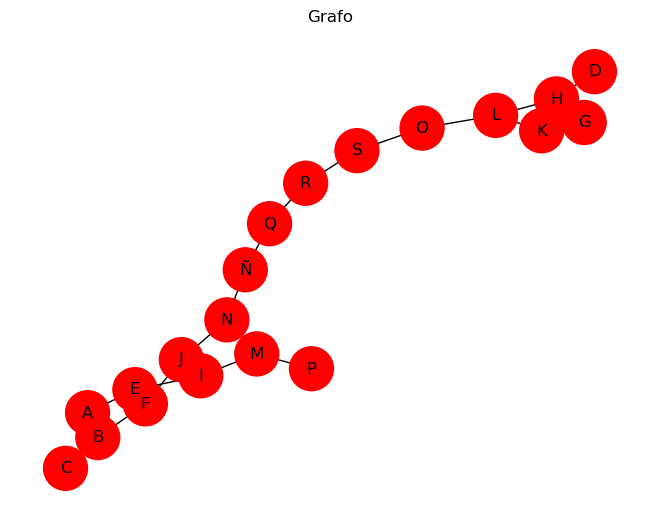

In [48]:
# Definimos el grafo como un diccionario de listas de adyacencia
grafo = {
    'A': ['B', 'E'],
    'B': ['A', 'C', 'F'],
    'C': ['B'],
    'D': ['H'],
    'E': ['A', 'F', 'I'],
    'F': ['B', 'E', 'J'],
    'G': ['H', 'K'],
    'H': ['G', 'L', 'D'],
    'I': ['E', 'J', 'M'],
    'J': ['F', 'I', 'N'],
    'K': ['G', 'L'],
    'L': ['H', 'K', 'O'],
    'M': ['I', 'N', 'P'],
    'N': ['J', 'M', 'Ñ'],
    'Ñ': ['N', 'Q'],
    'O': ['L', 'S'],
    'P': ['M'],
    'Q': ['Ñ', 'R'],
    'R': ['Q', 'S'],
    'S': ['R', 'O'],
}

plotGrafo(grafo, [], "Grafo")




NODO DE INICIO: A
NODO OBJETIVO: H

Recorrido DFS:
Total de iteraciones: 133
Primer camino encontrado en iteración: 17
Último camino encontrado en iteración: 132
Todos los caminos encontrados (16):
 1: A -> B -> F -> E -> I -> J -> N -> Ñ -> Q -> R -> S -> O -> L -> H
 2: A -> B -> F -> E -> I -> J -> N -> Ñ -> Q -> R -> S -> O -> L -> K -> G -> H
 3: A -> B -> F -> E -> I -> M -> N -> Ñ -> Q -> R -> S -> O -> L -> H
 4: A -> B -> F -> E -> I -> M -> N -> Ñ -> Q -> R -> S -> O -> L -> K -> G -> H
 5: A -> B -> F -> J -> I -> M -> N -> Ñ -> Q -> R -> S -> O -> L -> H
 6: A -> B -> F -> J -> I -> M -> N -> Ñ -> Q -> R -> S -> O -> L -> K -> G -> H
 7: A -> B -> F -> J -> N -> Ñ -> Q -> R -> S -> O -> L -> H
 8: A -> B -> F -> J -> N -> Ñ -> Q -> R -> S -> O -> L -> K -> G -> H
 9: A -> E -> F -> J -> I -> M -> N -> Ñ -> Q -> R -> S -> O -> L -> H
10: A -> E -> F -> J -> I -> M -> N -> Ñ -> Q -> R -> S -> O -> L -> K -> G -> H
11: A -> E -> F -> J -> N -> Ñ -> Q -> R -> S -> O -> L -> H
1

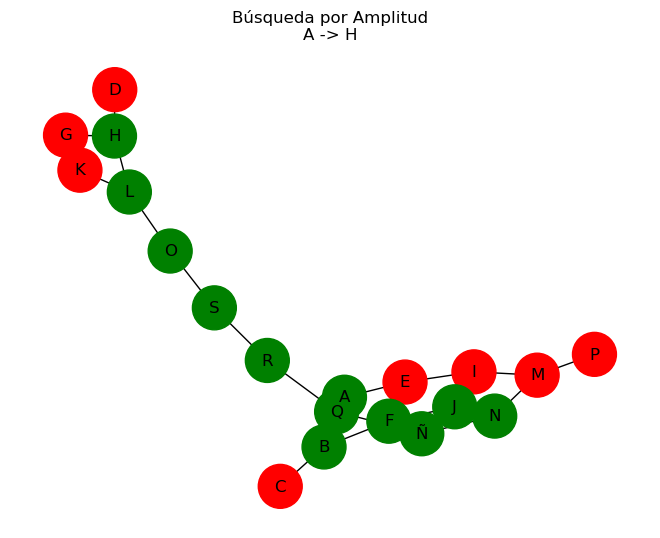

In [54]:
# INICIO
def main():
    nodo_inicio = input("Ingrese la casilla de inicio: ")
    nodo_objetivo = input("Ingrese la casilla final: ")

    busqueda(grafo, nodo_inicio, nodo_objetivo, imprimir=False)

main()

Creo que cada algoritmo tiene momentos donde es más útil que el otro. El algoritmo por profundidad como el implementado arriba, puede tener su fuerte en encontrar todos los caminos posibles, que tal vez pudieran necesitarse. El de amplitud, puede servir más en cuando no se busquen todas las alternativas, además de que requiere menos iteraciones.

Sin embargo, si se implementara que ambos colecten todos los resultados hasta recorrer todo el grafo, dependería en gran manera del grafo en cuestión, al igual que si ambos pararan en la primera solución que encontrasen, y qué sacrificios se están dispuestos a hacer: posiblemente perder más tiempo buscando una mejor solución, u obtener una solución más rápido, aunque posiblemente peor.

